# Classical Logic Gates with Quantum Circuits

In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
import numpy as np

Using the NOT gate (expressed as `x` in Qiskit), the CNOT gate (expressed as `cx` in Qiskit) and the Toffoli gate (expressed as `ccx` in Qiskit) create functions to implement the XOR, AND, NAND and OR gates.

An implementation of the NOT gate is provided as an example.

## NOT gate

This function takes a binary string input (`'0'` or `'1'`) and returns the opposite binary output'.

In [ ]:
def NOT(input):

    q = QuantumRegister(1) # a qubit in which to encode and manipulate the input
    c = ClassicalRegister(1) # a bit to store the output
    qc = QuantumCircuit(q, c) # this is where the quantum program goes
    
    # We encode '0' as the qubit state |0⟩, and '1' as |1⟩
    # Since the qubit is initially |0⟩, we don't need to do anything for an input of '0'
    # For an input of '1', we do an x to rotate the |0⟩ to |1⟩
    if input=='1':
        qc.x( q[0] )
        
    # Now we've encoded the input, we can do a NOT on it using x
    qc.x( q[0] )
    
    # Finally, we extract the |0⟩/|1⟩ output of the qubit and encode it in the bit c[0]
    qc.measure( q[0], c[0] )
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc,backend,shots=1)
    output = next(iter(job.result().get_counts()))
    
    return output

## XOR gate

Takes two binary strings as input and gives one as output.

The output is `'0'` when the inputs are equal and  `'1'` otherwise.

In [ ]:
def XOR(input1,input2):
    
    q = QuantumRegister(2) # two qubits in which to encode and manipulate the input
    c = ClassicalRegister(1) # a bit to store the output
    qc = QuantumCircuit(q, c) # this is where the quantum program goes
    
    # YOUR QUANTUM PROGRAM GOES HERE    
    qc.measure(q[1],c[0]) # YOU CAN CHANGE THIS IF YOU WANT TO
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc,backend,shots=1,memory=True)
    output = job.result().get_memory()[0]
    
    return output

## AND gate

Takes two binary strings as input and gives one as output.

The output is `'1'` only when both the inputs are `'1'`.

In [ ]:
def AND(input1,input2):
    
    q = QuantumRegister(3) # two qubits in which to encode the input, and one for the output
    c = ClassicalRegister(1) # a bit to store the output
    qc = QuantumCircuit(q, c) # this is where the quantum program goes
    
    # YOUR QUANTUM PROGRAM GOES HERE
    qc.measure(q[2],c[0]) # YOU CAN CHANGE THIS IF YOU WANT TO
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc,backend,shots=1,memory=True)
    output = job.result().get_memory()[0]
    
    return output

## NAND gate

Takes two binary strings as input and gives one as output.

The output is `'0'` only when both the inputs are `'1'`.

In [ ]:
def NAND(input1,input2):
  
    q = QuantumRegister(3) # two qubits in which to encode the input, and one for the output
    c = ClassicalRegister(1) # a bit to store the output
    qc = QuantumCircuit(q, c) # this is where the quantum program goes
    
    # YOUR QUANTUM PROGRAM GOES HERE
    qc.measure(q[2],c[0]) # YOU CAN CHANGE THIS IF YOU WANT TO
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc,backend,shots=1,memory=True)
    output = job.result().get_memory()[0]
    
    return output

## OR gate

Takes two binary strings as input and gives one as output.

The output is `'1'` if either input is `'1'`.

In [ ]:
def OR(input1,input2):
  
    q = QuantumRegister(3) # two qubits in which to encode the input, and one for the output
    c = ClassicalRegister(1) # a bit to store the output
    qc = QuantumCircuit(q, c) # this is where the quantum program goes
    
    # YOUR QUANTUM PROGRAM GOES HERE
    qc.measure(q[2],c[0]) # YOU CAN CHANGE THIS IF YOU WANT TO
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc,backend,shots=1,memory=True)
    output = job.result().get_memory()[0]
    
    return output

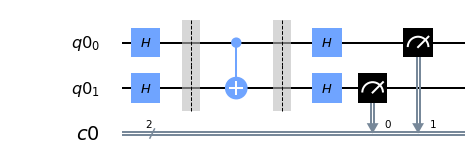

In [2]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)

qc.h(0)
qc.h(1)
qc.barrier()
qc.cx(0,1)
qc.barrier()
qc.h(0)
qc.h(1)

qc.measure(q[1],c[0])
qc.measure(q[0],c[1])
qc.draw('mpl')

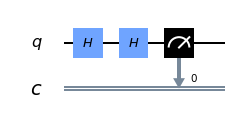

In [16]:
qc = QuantumCircuit(1,1)
#qc.x(0)
qc.h(0)
qc.h(0)
qc.measure(0,0)
qc.draw('mpl')

In [17]:
# We'll run the program on a simulator
backend = Aer.get_backend('qasm_simulator')
# Since the output will be deterministic, we can use just a single shot to get it
job = execute(qc,backend,shots=1,memory=True)
output = job.result().get_memory()
print(output)

['0']


## Tests

The following code runs the functions above for all possible inputs, so that you can check whether they work.

In [ ]:
print('\nResults for the NOT gate')
for input in ['0','1']:
    print('    Input',input,'gives output',NOT(input))
    
print('\nResults for the XOR gate')
for input1 in ['0','1']:
    for input2 in ['0','1']:
        print('    Inputs',input1,input2,'give output',XOR(input1,input2))

print('\nResults for the AND gate')
for input1 in ['0','1']:
    for input2 in ['0','1']:
        print('    Inputs',input1,input2,'give output',AND(input1,input2))

print('\nResults for the NAND gate')
for input1 in ['0','1']:
    for input2 in ['0','1']:
        print('    Inputs',input1,input2,'give output',NAND(input1,input2))

print('\nResults for the OR gate')
for input1 in ['0','1']:
    for input2 in ['0','1']:
        print('    Inputs',input1,input2,'give output',OR(input1,input2))

In [ ]:
import qiskit
qiskit.__qiskit_version__